# 各資料讀取(技術面基本面)

In [2]:
from finlab.ml import quarterly_fundamental,monthly_fundamental,to_seasonal
from finlab import data
import pandas as pd 
import ffn 

data = data.Data()

#基本面建置


monthly_fundamental = monthly_fundamental()
quarterly_fundamental = quarterly_fundamental()

#技術面建置 (#開高低收建置(還原息))
close = data.get_adj('收盤價')
high = data.get_adj('最高價')
low = data.get_adj('最低價')
open = data.get_adj('開盤價')
volume = data.get('成交股數')
#各種指數建置

#籌碼面建置
#chip_analysis["外資買超"] = data.get('外陸資買進股數(不含外資自營商)') + data.get('外陸資買進股數(不含外資自營商)') 
#chip_analysis["外資賣超"] 

chip_analysis ={}
chip_analysis["自營商買賣超"] = data.get('自營商買賣超股數(自行買賣)') + data.get('自營商買賣超股數(避險)')
chip_analysis["投信買賣超"]= data.get('投信買賣超股數')





KeyError: '當月營收'

In [105]:
print(monthly_fundamental.loc['1101']["當月營收"].dropna())

print(close['1101'])

date
2005-02-10    2.746766e+06
2005-03-10    1.566092e+06
2005-04-10    2.504657e+06
2005-05-10    2.418388e+06
2005-06-10    2.394229e+06
                  ...     
2022-08-10    3.670380e+07
2022-09-10    3.883788e+07
2022-10-10    3.780259e+07
2022-11-10    4.130202e+07
2022-12-10    3.514920e+07
Name: 當月營收, Length: 215, dtype: float64
date
2007-04-23     29.600000
2007-04-24     30.250000
2007-04-25     29.650000
2007-04-26     29.650000
2007-04-27     30.350000
                 ...    
2022-12-05    103.759727
2022-12-06    102.528158
2022-12-07    102.682104
2022-12-08    102.220265
2022-12-09    103.759727
Name: 1101, Length: 3861, dtype: float64


## for test use 

In [7]:
import numpy as np
import pandas as pd
#from talib import abstract
#from finlab.data import Data
import ffn

%matplotlib inline

#data = Data()

sids =[]
start_time = '2012-01-01'
end_time = '2020-12-2'
#signal = data.talib('CDLTRISTAR')

#close = data.get_adj('收盤價')
#open = data.get_adj('開盤價')

prices = ffn.get("2454.TW,2330.TW",start=start_time,end =end_time )#,itot,gld,ivv,uso
ffn_ = True
print(prices)
close = prices
open = prices

                2454tw      2330tw
Date                              
2012-01-02  163.259140   50.005951
2012-01-03  167.437042   50.507442
2012-01-04  167.758392   50.507442
2012-01-05  181.256226   54.447746
2012-01-06  179.006561   54.161163
...                ...         ...
2020-11-26  638.293823  470.596985
2020-11-27  633.921936  470.596985
2020-11-30  615.560059  462.416901
2020-12-01  609.439453  471.559387
2020-12-02  622.555054  480.220642

[2183 rows x 2 columns]


# 回測系統建置

<AxesSubplot:xlabel='Date'>

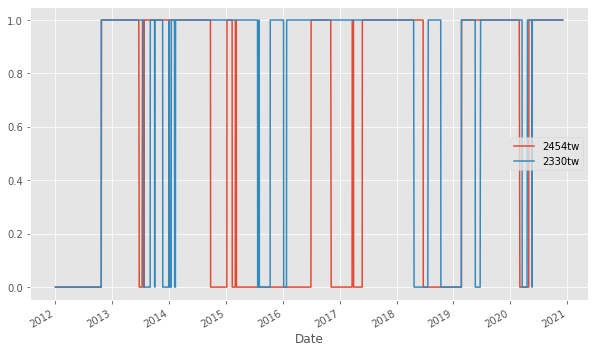

In [8]:

sids =[]
start_time = '2012-01-01'
end_time = '2020-12-2'
max_proportion = 0.2
#signal = signal[sids]
#日期及回測對象前處理
if sids != []:
    close = close[sids]
    open_ = open_[sids]

if start_time or close_time :
    close = close[start_time : end_time]
    
#buy,sell需要自定義
buy = (close > close.rolling(60).mean()) & (close > close.rolling(200).mean()) 
sell = (close < close.rolling(60).mean()) & (close < close.rolling(200).mean())


#hold前處理
hold = pd.DataFrame(np.nan, index=close.index, columns=close.columns)
hold[buy] = 1
hold[sell] = 0
hold.ffill(inplace=True)
hold.fillna(0, inplace=True)
hold = hold.shift()

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
hold.plot()

# 計算報酬率

In [28]:
import numpy as np 

#Proportion = np.full(len(gain.columns),0)
Porportion = hold.copy()
Proportion = Porportion.replace(1,(1/hold.sum(axis=1)))

print(Proportion)
print(hold )

            2454tw  2330tw
Date                      
2012-01-02     NaN     NaN
2012-01-03     0.0     0.0
2012-01-04     0.0     0.0
2012-01-05     0.0     0.0
2012-01-06     0.0     0.0
...            ...     ...
2020-11-26     1.0     1.0
2020-11-27     1.0     1.0
2020-11-30     1.0     1.0
2020-12-01     1.0     1.0
2020-12-02     1.0     1.0

[2183 rows x 2 columns]
            2454tw  2330tw
Date                      
2012-01-02     NaN     NaN
2012-01-03     0.0     0.0
2012-01-04     0.0     0.0
2012-01-05     0.0     0.0
2012-01-06     0.0     0.0
...            ...     ...
2020-11-26     1.0     1.0
2020-11-27     1.0     1.0
2020-11-30     1.0     1.0
2020-12-01     1.0     1.0
2020-12-02     1.0     1.0

[2183 rows x 2 columns]


In [30]:
import matplotlib.pyplot as plt

#gain = 明天收盤價 / 今天收盤價  得到單日報酬 (ffill補足未交易日，往上填充)
gain = close.shift(-1).ffill() / close.ffill()

#print(gain[hold == 1]['0050'])
#profit 取得gain報酬且hold = true , 資產分布平均加乘 (當天沒買進則填入1) 
#profit = 資產平均分布加乘

###嘗試修改
#print((gain[hold==1]*[0.5,0.5]))
#rint((gain[hold == 1].fillna(1)*[1,0]).sum(axis=1).replace(0,1).cumprod())

profit = (gain[hold == 1].mean(axis=1)).fillna(1).cumprod()

#(gain[hold == 1].fillna(1)*[0.2,0.8]).sum(axis=1).replace(0,1).cumprod().plot()



              2454tw    2330tw
Date                          
2012-01-02       NaN       NaN
2012-01-03       NaN       NaN
2012-01-04       NaN       NaN
2012-01-05       NaN       NaN
2012-01-06       NaN       NaN
...              ...       ...
2020-11-26  0.993151  1.000000
2020-11-27  0.971034  0.982618
2020-11-30  0.990057  1.019771
2020-12-01  1.021521  1.018367
2020-12-02  1.000000  1.000000

[2183 rows x 2 columns]


# 股票變換時才變更部位

<AxesSubplot: xlabel='Date'>

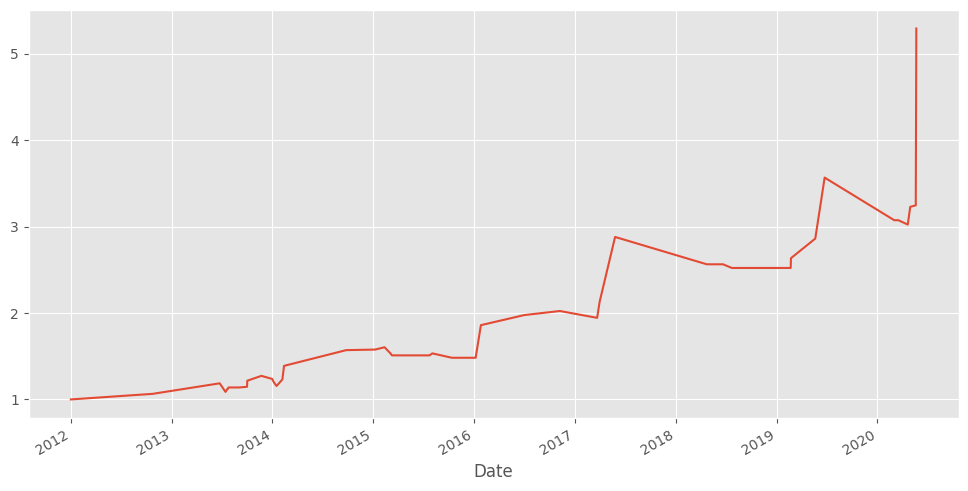

In [17]:
#得到股票更換總數量
rebalance = (hold.diff().abs().sum(axis=1) != 0).cumsum()

#得到股票變換日期
rebalance_hold = hold[rebalance.diff() != 0]

#得到股票變換日期報酬
rebalance_gain = gain.groupby(rebalance).apply(lambda s:s.cumprod().iloc[-1])
rebalance_gain.index = rebalance_hold.index


profit2 = (rebalance_gain[rebalance_hold == 1]).mean(axis=1).fillna(1).cumprod()

profit2.plot()

# 計算手續費報酬

Stats for None from 2012-01-02 00:00:00 - 2020-05-21 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
364.63%             5.18  20.11%  -15.99%

Annualized Returns:
mtd     3m      6m      ytd     1y      3y      5y      10y    incep.
------  ------  ------  ------  ------  ------  ------  -----  --------
62.97%  45.78%  45.78%  45.78%  81.22%  20.92%  27.84%  -      20.11%

Periodic:
        daily     monthly    yearly
------  --------  ---------  --------
sharpe  5.18      1.40       0.97
mean    1032.91%  92.78%     22.30%
vol     199.37%   66.10%     22.90%
skew    2.79      2.32       -0.75
kurt    10.59     6.00       -1.10
best    62.57%    62.97%     45.78%
worst   -14.08%   -7.15%     -13.61%

Drawdowns:
max      avg        # days
-------  -------  --------
-15.99%  -10.35%    161.17

Misc:
---------------  ------
avg. up month    15.51%
avg. down month  -4.72%
up year %   

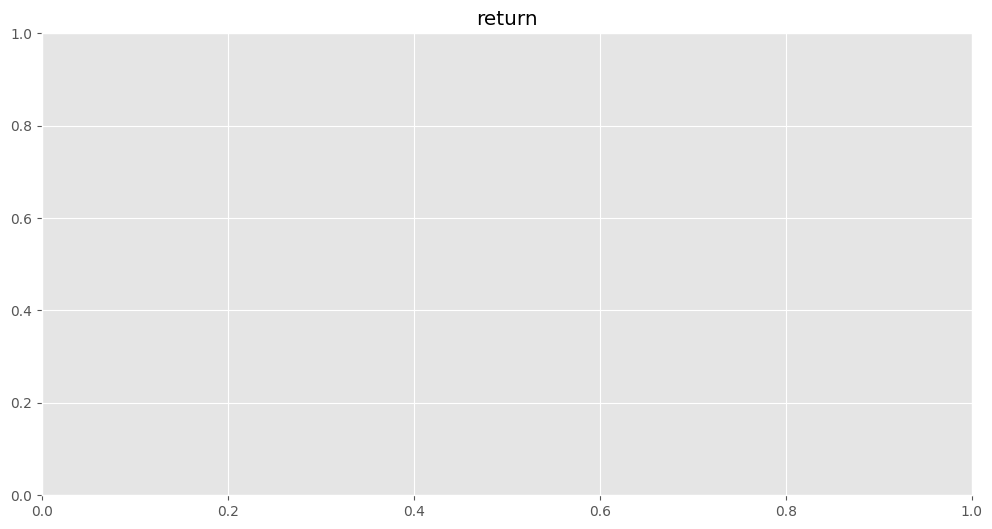

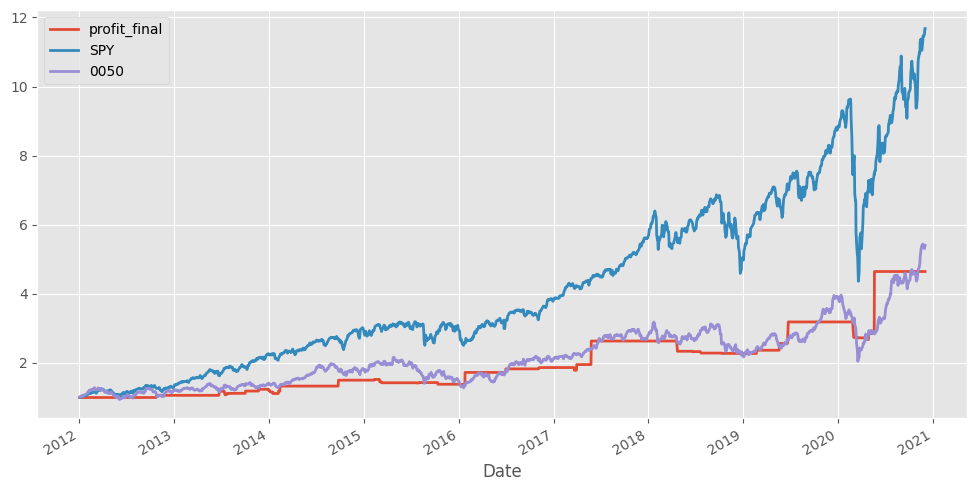

In [13]:
#當同時有多項資產買進，資產平均分配  #修改配置是這
position_diff = rebalance_hold.div(rebalance_hold.sum(axis=1), axis=0)
##將nan部分補0，diff等等方便tax計算
position_diff = position_diff.fillna(0).diff()

#計算交易手續費
tax_ratio = position_diff.copy()
tax_ratio[tax_ratio < 0] *= (1.425/1000 + 3/1000)
tax_ratio[tax_ratio > 0] *= (1.425/1000)
##將買賣進手續費變成正數，並全部加總
tax_ratio = tax_ratio.abs().sum(axis=1)

###加上手續費報酬
profit_final = (rebalance_gain[rebalance_hold == 1].mean(axis=1).fillna(1) * (1 - tax_ratio)).cumprod()

all_profit = {}
all_profit['profit_final'] = profit_final

#獲得0050資料
if ffn_:
    twii = ffn.get("0050.TW",start=start_time,end =end_time)
    twii = twii['0050tw']
else:
    twii = data.get_adj('收盤價')['0050'][start_time:end_time]
    
SPY = ffn.get("SPY",start=start_time,end =end_time)["spy"]

all_profit['SPY'] = (SPY.shift(-1)/SPY .shift()).cumprod()
all_profit['0050'] = (twii.shift(-1)/twii.shift()).cumprod()

all_profit = pd.DataFrame(all_profit,index=close.index)
all_profit = all_profit.ffill()
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
all_profit.plot(linestyle='solid',linewidth=2)
profit_final.iloc[-1]

stats = profit_final.calc_stats()
stats.display()
print("\nCompare With 0050 (return):")
print("----------------  -----")
print("portfolio_Profit ","{:.2f}%".format(profit_final.iloc[-1]*100))
print("0050             ","{:.2f}%".format(all_profit['0050'][-1]*100))
print("----------------  -----")